In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_hand_and_fingers(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3),(1,1))
    img = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel)
    a = img.copy()
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,91, -9)
    dilate_sz = 3
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * dilate_sz, 2 * dilate_sz),(dilate_sz, dilate_sz))
    img = cv2.dilate(img, element,iterations = 1)
    return img

In [3]:
def detect_hand_silhoutte(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7),(3,3))
    img = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, kernel)
    img = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,191, 9)
    erode_sz = 5
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2 * erode_sz + 1, 2 * erode_sz + 1),(erode_sz, erode_sz))
    erosion = cv2.erode(img,kernel,iterations = 1)
    img = cv2.erode(img, element)
    dilate_sz = 3
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2 * dilate_sz + 1, 2 * dilate_sz + 1),(dilate_sz, dilate_sz))
    img = cv2.dilate(img, element, iterations = 1)

    cv2.bitwise_not(img, img)
    return img

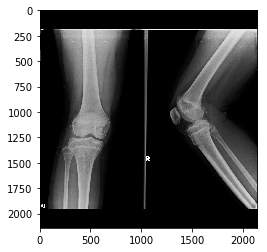

In [61]:
img = cv2.imread('./X_Ray_Data_set/Knee2Dto3D_120XRrays/Knee2Dto3D_120XRrays/stage0/1.jpg', 0)
#img = cv2.imread('./photo.jpg',0)
def show_img(img):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap='gray')
    plt.show()
show_img(img)

In [62]:
cv2.fastNlMeansDenoising(img, img,3, 7, 21)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

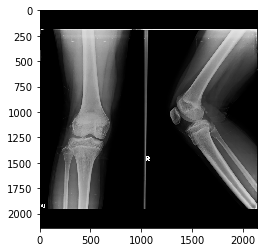

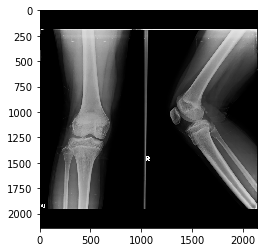

In [63]:
img2 = img.copy()
show_img(img)
show_img(img2)

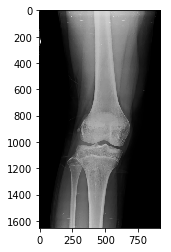

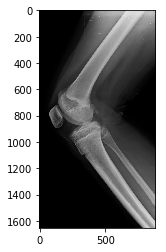

In [64]:
height, width = img.shape[:2]
start_row, start_col = int(230), int(0)
end_row, end_col = int(height*0.88), int(width*0.43)
left_img = img[start_row:end_row , start_col:end_col]
left_img2 = left_img.copy()
show_img(left_img) 

start_row, start_col = int(230), int(width*0.56)
end_row, end_col = int(height*0.88), int(width*0.972)
right_img = img[start_row:end_row , start_col:end_col]
right_img2 = right_img.copy()
show_img(right_img) 

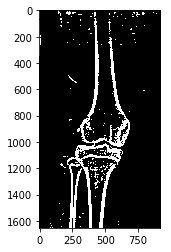

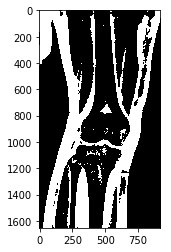

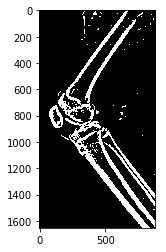

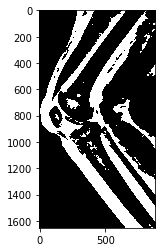

In [65]:
gray_l = detect_hand_and_fingers(left_img);show_img(gray_l)
gray_silhouette_l = detect_hand_silhoutte(left_img2);show_img(gray_silhouette_l)
gray_r = detect_hand_and_fingers(right_img);show_img(gray_r)
gray_silhouette_r = detect_hand_silhoutte(right_img2);show_img(gray_silhouette_r)

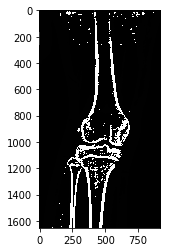

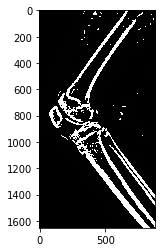

In [66]:
bones_l = gray_l - gray_silhouette_l;show_img(bones_l)
bones_r = gray_r - gray_silhouette_r;show_img(bones_r)

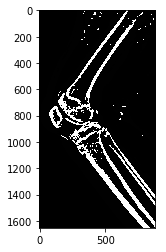

In [67]:
_ , contours_l, hierarchy = cv2.findContours(bones_l, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
_ , contours_r, hierarchy = cv2.findContours(bones_r, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(_, contours_r[-1], -1, (0,255,0), 0)
show_img(_)

In [17]:
contour_r = []
contour_l = []
contour_r = [_ for sublist in [a.tolist() for a in contours_r] for item in sublist for _ in item]
contour_l = [_ for sublist in [a.tolist() for a in contours_l] for item in sublist for _ in item]

In [18]:
contour_r

[[1021, 1296],
 [1020, 1297],
 [1019, 1297],
 [1018, 1297],
 [1017, 1298],
 [1017, 1299],
 [1017, 1300],
 [1017, 1301],
 [1017, 1302],
 [1018, 1303],
 [1019, 1303],
 [1020, 1304],
 [1021, 1305],
 [1022, 1305],
 [1023, 1306],
 [1024, 1305],
 [1025, 1305],
 [1026, 1304],
 [1026, 1303],
 [1026, 1302],
 [1026, 1301],
 [1026, 1300],
 [1026, 1299],
 [1026, 1298],
 [1026, 1297],
 [1026, 1296],
 [1025, 1296],
 [1024, 1296],
 [1023, 1296],
 [1022, 1296],
 [977, 1247],
 [976, 1248],
 [977, 1247],
 [978, 1247],
 [972, 1240],
 [971, 1241],
 [971, 1242],
 [971, 1243],
 [971, 1244],
 [971, 1245],
 [971, 1246],
 [972, 1247],
 [973, 1247],
 [974, 1248],
 [973, 1247],
 [973, 1246],
 [973, 1245],
 [974, 1244],
 [975, 1244],
 [976, 1243],
 [977, 1244],
 [978, 1244],
 [979, 1245],
 [979, 1244],
 [979, 1243],
 [978, 1242],
 [977, 1241],
 [976, 1240],
 [975, 1240],
 [974, 1240],
 [973, 1240],
 [892, 1213],
 [891, 1214],
 [890, 1214],
 [890, 1215],
 [890, 1216],
 [891, 1217],
 [892, 1218],
 [893, 1218],
 [89

In [14]:
import json, codecs
#np_array_to_list = contours.tolist()
json_file = "point_l.json" 
json.dump(contour_l, codecs.open(json_file, 'w', encoding='utf-8'), sort_keys=True, indent=4)
josn_file = "point_r.json"
json.dump(contour_r, codecs.open(json_file, 'w', encoding='utf-8'), sort_keys=True, indent=4)